### DynaQ 算法
#### 问题定义
悬崖漫步是一个非常经典的强化学习环境，它要求一个智能体从起点出发，避开悬崖行走，最终到达目标位置。如图 4-1 所示，有一个 4×12 的网格世界，每一个网格表示一个状态。智能体的起点是左下角的状态，目标是右下角的状态，智能体在每一个状态都可以采取 4 种动作：上、下、左、右。如果智能体采取动作后触碰到边界墙壁则状态不发生改变，否则就会相应到达下一个状态。环境中有一段悬崖，智能体掉入悬崖或到达目标状态都会结束动作并回到起点，也就是说掉入悬崖或者达到目标状态是终止状态。智能体每走一步的奖励是 −1，掉入悬崖的奖励是 −100。

In [7]:
import gym
import matplotlib.pyplot as plt 
import numpy as np
from tqdm import tqdm  # tqdm是显示循环进度条的库
from RL_algo.model_based.DynaQ import DynaQ

In [8]:
env=gym.make("CliffWalking-v0")
nrow = env.unwrapped.shape[0]
ncol = env.unwrapped.shape[1]
np.random.seed(3)
epsilon = 0.1
alpha = 0.1
gamma = 0.9
s_num = nrow*ncol
n_action = env.action_space.n

Iteration 9: 100%|██████████| 50/50 [00:00<00:00, 515.88it/s, episode=500, return=-24.600]


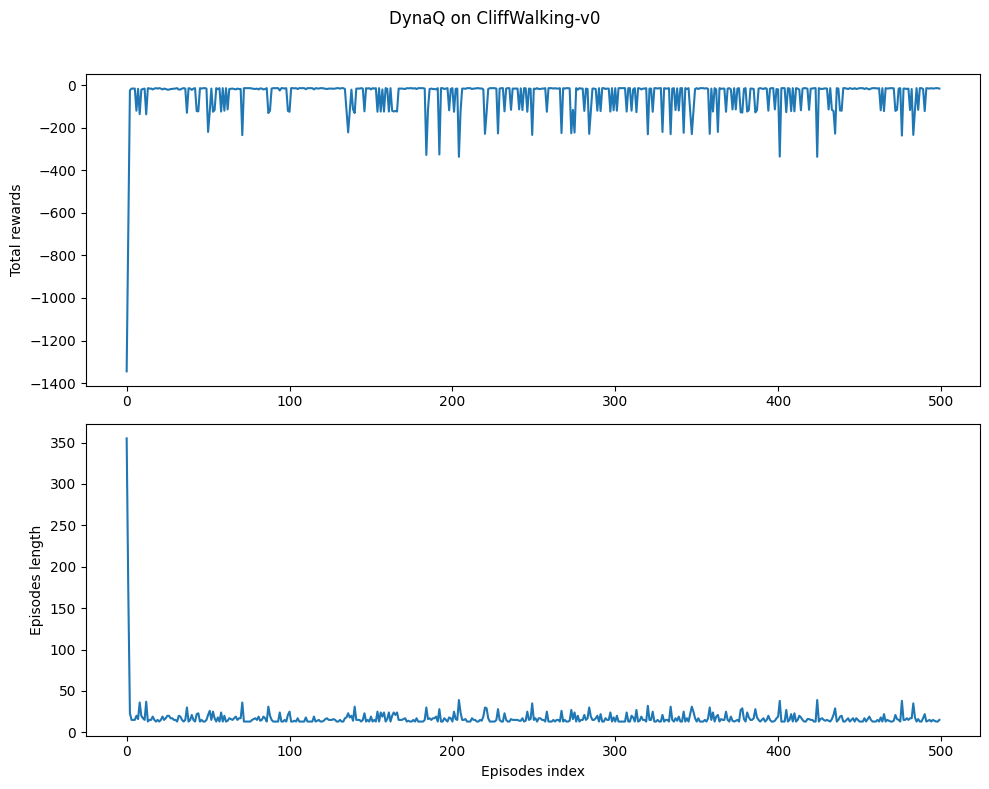

o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  o  o  o  o  o  o  o  o  o  o  o
o  C  C  C  C  C  C  C  C  C  C  x

Sarsa算法最终收敛得到的策略为：
o→↓o o→↓o o→↓o o→↓o o→↓o o→↓o o→↓o o→↓o o→↓o o→↓o o→↓o oo↓o 
o→↓o o→↓o o→↓o o→↓o o→↓o o→↓o o→↓o o→↓o o→↓o o→↓o o→↓o oo↓o 
o→oo o→oo o→oo o→oo o→oo o→oo o→oo o→oo o→oo o→oo o→oo oo↓o 
↑ooo **** **** **** **** **** **** **** **** **** **** EEEE 


In [9]:
num_episodes = 500  # 智能体在环境中运行的序列的数量
n_planning = 20 # 计划步数
agent_DynaQ = DynaQ(epsilon, alpha, gamma,s_num,n_action,n_planning,env,num_episodes)
agent_DynaQ.run_DynaQ()
# 打印最优的策略
def print_agent(agent_DynaQ, action_meaning, disaster=[], end=[]):
    for i in range(nrow):
        for j in range(ncol):
            if (i * ncol + j) in disaster:
                print('****', end=' ')
            elif (i * ncol + j) in end:
                print('EEEE', end=' ')
            else:
                a = agent_DynaQ.best_action(i * ncol + j)
                pi_str = ''
                for k in range(len(action_meaning)):
                    pi_str += action_meaning[k] if a[k] > 0 else 'o'
                print(pi_str, end=' ')
        print()


action_meaning = ['↑', '→', '↓', '←']
env.render()
print('Sarsa算法最终收敛得到的策略为：')
print_agent(agent_DynaQ, action_meaning, list(range(37, 47)), [47])